# EDA Assignment
Does the family background, family relationship and family support influence a student's performance?
What can a student do (attributes that they can control) to improve their performance in these subjects?
What can schools do (attributes that they can control) to help students perform better in these subjects?
Which school has a better overall student performance in these two subjects? Why do you think that is?
How do the students perform over time? Are they consistent across terms, or do they gradually improve?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
lang = pd.read_csv("performance_lang.csv")
math = pd.read_csv("performance_math.csv")

## Effect of family background, relations and support on academic performance
### Deciding what to include in dataframe
It is assumed that the tests used across both schools are standardised to allow for meaningful comparison. In other words, we are assuming all students took the same test and are graded with the same marking criteria, so that the scores show an accurate representation of their academic performance.
As primary objective is to find a relation between family and scores, we create a dataframe involving only those factors. Other factors such as internet access, age etc. will be left out for now.


In [3]:
#create dataframe concerning fam rs, fam supp, fam background(parents job/edu levels)

data = pd.DataFrame(lang[['FamilyRel', 'FamilySup', 'MomEdu', 'MomJob', 'DadEdu', 'DadJob','T1', 'T2', 'T3']])
dataMath = pd.DataFrame(math[['FamilyRel', 'FamilySup', 'MomEdu', 'MomJob', 'DadEdu', 'DadJob','T1', 'T2', 'T3']])

In [4]:
data['FamilyRel'] = data['FamilyRel'].astype('category')
data['FamilySup'] = data['FamilySup'].astype('category')
data['MomEdu'] = data['MomEdu'].astype('category')
data['MomJob'] = data['MomJob'].astype('category')
data['DadEdu'] = data['DadEdu'].astype('category')
data['DadJob'] = data['DadJob'].astype('category')

dataMath['FamilyRel'] = dataMath['FamilyRel'].astype('category')
dataMath['FamilySup'] = dataMath['FamilySup'].astype('category')
dataMath['MomEdu'] = dataMath['MomEdu'].astype('category')
dataMath['MomJob'] = dataMath['MomJob'].astype('category')
dataMath['DadEdu'] = dataMath['DadEdu'].astype('category')
dataMath['DadJob'] = dataMath['DadJob'].astype('category')

## Including new columns "Total" and "Average"
Plotting average test scores against family relations, support and background will tell us how a student performs overall across all 3 term tests. This also takes into account that some students may have scored 0 for certain tests. 

Although this is ambiguous in terms of whether the score of 0 is actually the student's best effort or due to other factors like absenteeism or cheating, it will be assumed that all scores are a result of genuine attempts at the test.

In [5]:
#add a new column containing sum of total test scores for all 3 terms called 'Total'
data['Total Lang'] = data['T1'] + data['T2'] + data['T3']
dataMath['Total Math'] = dataMath['T1'] + dataMath['T2'] + dataMath['T3']

In [6]:
data['Average Lang'] = data['Total Lang']/3
dataMath['Average Math'] = dataMath['Total Math']/3

## Family relations and average score


Blue: Language
Red: Math
Scores vs family relations:                                        Count:


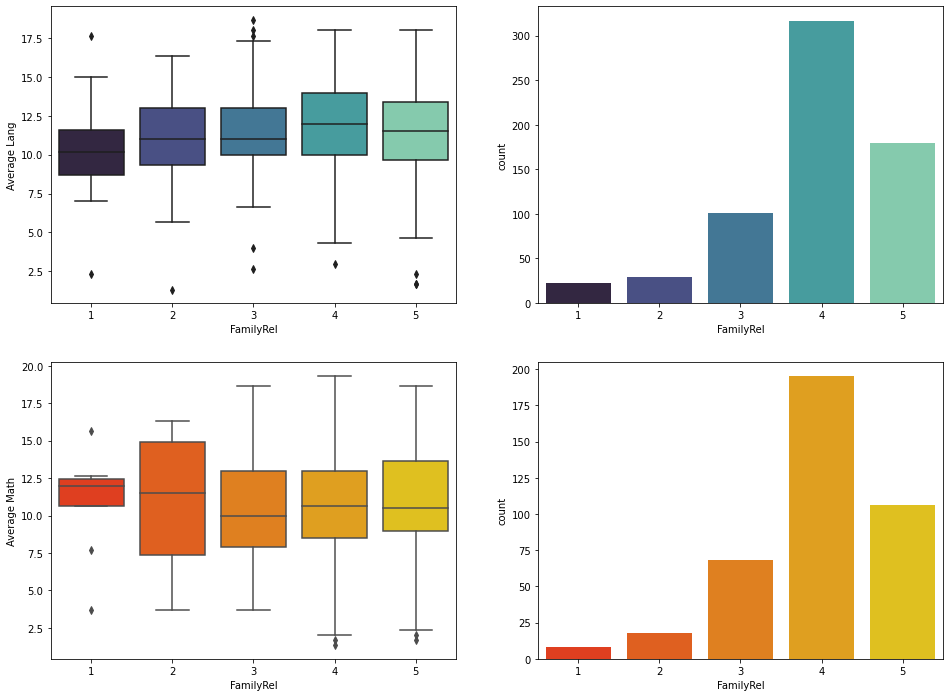

In [7]:
f, axes = plt.subplots(2,2, figsize = (16,12))
axes[0,0] = sb.boxplot(x = 'FamilyRel', y = 'Average Lang', data = data, ax = axes[0,0], palette = 'mako')
axes[0,1] = sb.countplot(x = data["FamilyRel"], ax = axes[0,1], palette = 'mako')
axes[1,0] = sb.boxplot(x = 'FamilyRel', y = 'Average Math', data = dataMath, ax = axes[1,0], palette = 'autumn')
axes[1,1] = sb.countplot(x = dataMath["FamilyRel"], ax = axes[1,1], palette = 'autumn')
print("Blue: Language\nRed: Math")
print("Scores vs family relations:                                        Count:")

### Verdict
From the boxplots, while there is a slight correlation for the language scores between the quality of family relation and average test scores, it is not conclusive at all for the math scores, as the plots not only have large distributions and variances but also do not seem to follow a trend. Furthermore, the counts of responses indicating poorer family relations (1-2) are significantly lower than that of better relations (3-5). Thus, it is difficult to affirm the effect of family relations on students' performance in school.


## Family support and average score

Blue: Language
Red: Math
Scores vs family support:


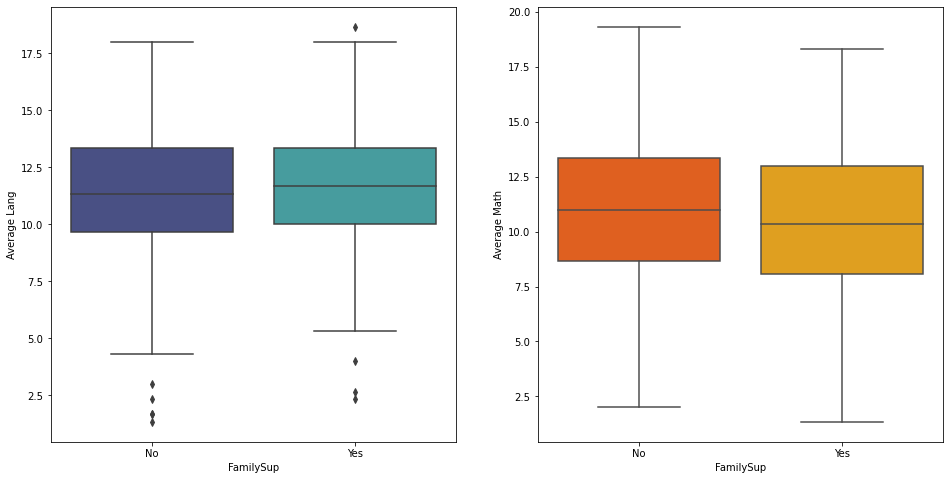

In [8]:
f, axes = plt.subplots(1,2, figsize = (16,8))
axes[0] = sb.boxplot(x = 'FamilySup', y = 'Average Lang', data = data, ax = axes[0], palette = 'mako')
axes[1] = sb.boxplot(x = 'FamilySup', y = 'Average Math', data = dataMath, ax = axes[1], palette = 'autumn')
print("Blue: Language\nRed: Math")
print("Scores vs family support:")

### Verdict
Family support seems to have meagre effect on students' grades in both language and math tests.

## Family background and average score
### Parents' Education


Blue: Language
Red: Math
Scores vs Parents' education:                                      Count:


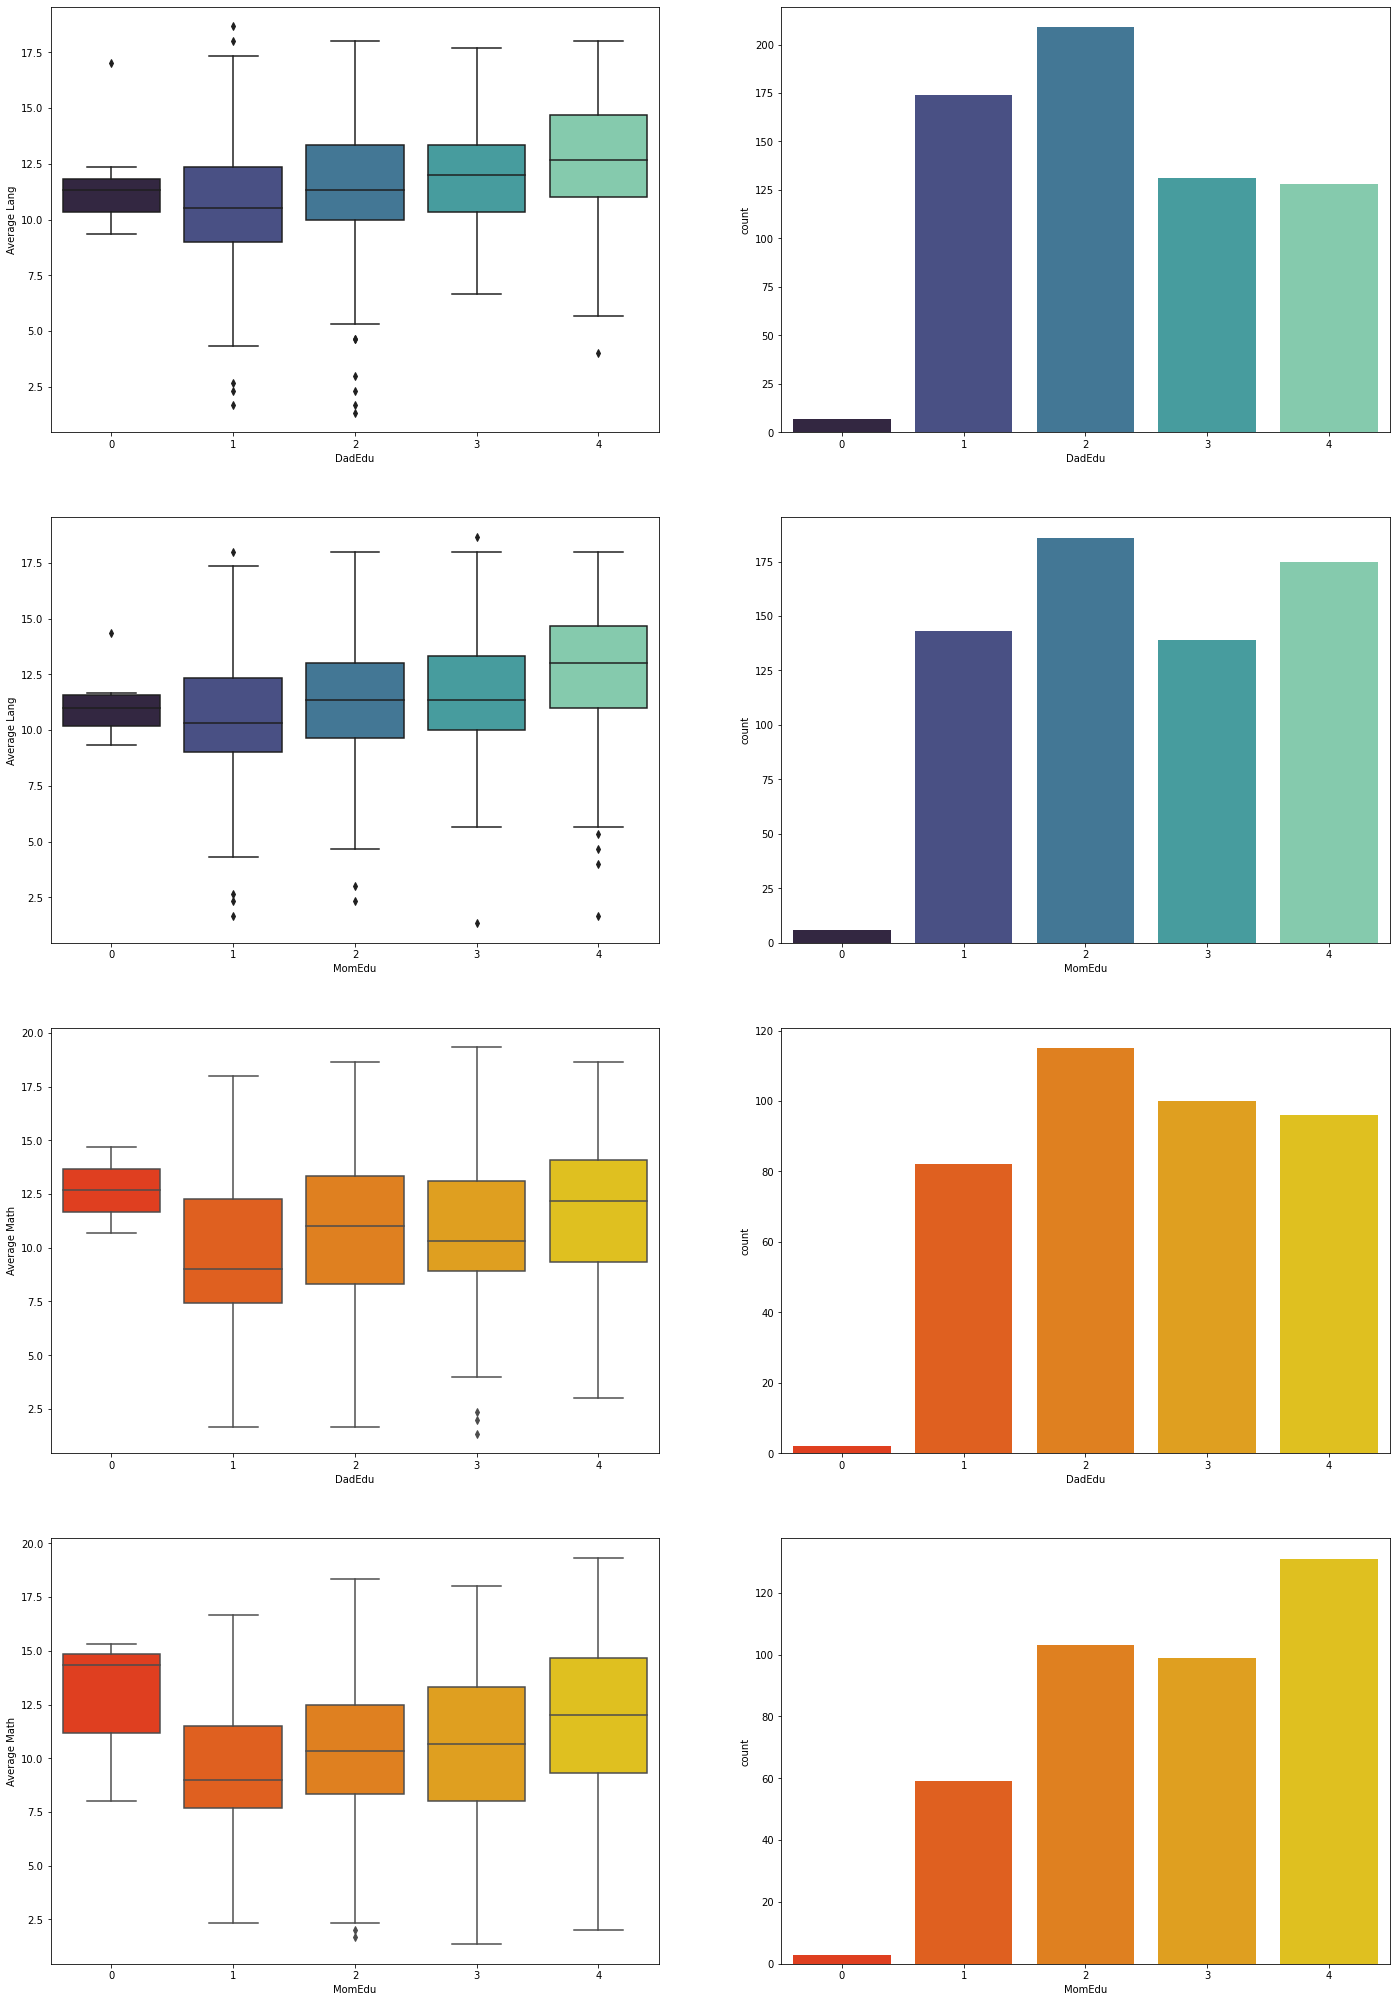

In [9]:
f, axes = plt.subplots(4,2, figsize = (24,36))
axes[0,0] = sb.boxplot(x = 'DadEdu', y = 'Average Lang', data = data, ax = axes[0,0], palette = 'mako')
axes[1,0] = sb.boxplot(x = 'MomEdu', y = 'Average Lang', data = data,ax = axes[1,0], palette = 'mako')
axes[0,1] = sb.countplot(x = "DadEdu", data = data,ax = axes[0,1], palette = 'mako')
axes[1,1] = sb.countplot(x = "MomEdu", data = data,ax = axes[1,1], palette = 'mako')

axes[2,0] = sb.boxplot(x = 'DadEdu', y = 'Average Math', data = dataMath, ax = axes[2,0], palette = 'autumn')
axes[3,0] = sb.boxplot(x = 'MomEdu', y = 'Average Math', data = dataMath,ax = axes[3,0], palette = 'autumn')
axes[2,1] = sb.countplot(x = "DadEdu", data = dataMath,ax = axes[2,1], palette = 'autumn')
axes[3,1] = sb.countplot(x = "MomEdu", data = dataMath,ax = axes[3,1], palette = 'autumn')

print("Blue: Language\nRed: Math")
print("Scores vs Parents' education:                                      Count:")

### Verdict
From the boxplots of education levels 1-4 for both subjects, there is an upward trend of parents' education levels and average scores achieved in the tests, indicating that higher education in parents may result in better scores in children. However, the plots of education levels of 0 is uncharacteristic. The count plots show that the number of responses with education level 0 is significantly lower than that of the other levels. This explains the unexpected boxplot of test scores earlier, as the sample size is too low to accurately form a distribution.

## Family background and average score
### Parents' Jobs

Blue: Language
Red: Math
Scores vs Dad Job:                                                   Scores vs Mom Job:


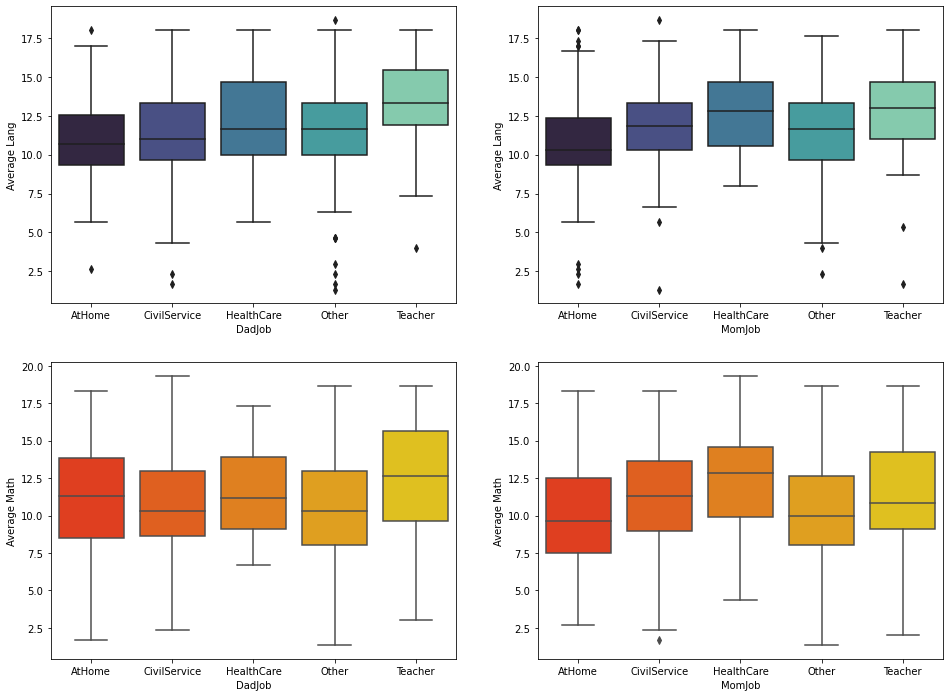

In [10]:
f, axes = plt.subplots(2,2, figsize = (16,12))

axes[0,0] = sb.boxplot(x = 'DadJob', y = 'Average Lang', data = data, ax = axes[0,0], palette = 'mako')
axes[0,1] = sb.boxplot(x = 'MomJob', y = 'Average Lang', data = data, ax = axes[0,1], palette = 'mako')
axes[1,0] = sb.boxplot(x = 'DadJob', y = 'Average Math', data = dataMath, ax = axes[1,0], palette = 'autumn')
axes[1,1] = sb.boxplot(x = 'MomJob', y = 'Average Math', data = dataMath, ax = axes[1,1], palette = 'autumn')

print("Blue: Language\nRed: Math")
print("Scores vs Dad Job:                                                   Scores vs Mom Job:")

### Verdict
The plots for parents' occupations show a marked difference in average test scores when categorised accordingly. In particular, students who have parent in healthcare or have teachers as parents typically score better than those whose parents are not. This makes sense as teachers may have a better understanding of how their child performs at school and may know how to best assist them than other parents who do not work in education. Thus, it can be said that family background does indeed influence students' performance.

## What can a student do (attributes that they can control) to improve their performance in these subjects?


### Attributes under a student's control include StudyTime, Activities, Romantic, GoingOut
A student should be able to 
1. Dictate how much time they allocate to study
2. Choose whether they join an activity or not
3. Choose whether to enter a relationship or not
4. Dictate how often they agree to go out with friends

Thus create dataframes isolating these factors, adding appropriate columns "Total" and "Average" as before.

In [11]:
student_lang = pd.DataFrame(lang[['StudyTime', 'Activities', 'Romantic', 'GoingOut','T1', 'T2', 'T3']])
student_math = pd.DataFrame(math[['StudyTime', 'Activities', 'Romantic', 'GoingOut','T1', 'T2', 'T3']])

In [12]:
student_lang['Total Lang'] = student_lang["T1"] + student_lang["T2"] + student_lang["T3"]
student_lang['Average Lang'] = student_lang['Total Lang']/3

student_math['Total Math'] = student_math["T1"] + student_math["T2"] + student_math["T3"]
student_math['Average Math'] = student_math['Total Math']/3

In [13]:
student_lang['StudyTime'] = student_lang['StudyTime'].astype('category')
student_lang['Activities'] = student_lang['Activities'].astype('category')
student_lang['Romantic'] = student_lang['Romantic'].astype('category')
student_lang['GoingOut'] = student_lang['GoingOut'].astype('category')

student_math['StudyTime'] = student_math['StudyTime'].astype('category')
student_math['Activities'] = student_math['Activities'].astype('category')
student_math['Romantic'] = student_math['Romantic'].astype('category')
student_math['GoingOut'] = student_math['GoingOut'].astype('category')

Blue: Language
Red: Math
Scores vs student controlled factors:


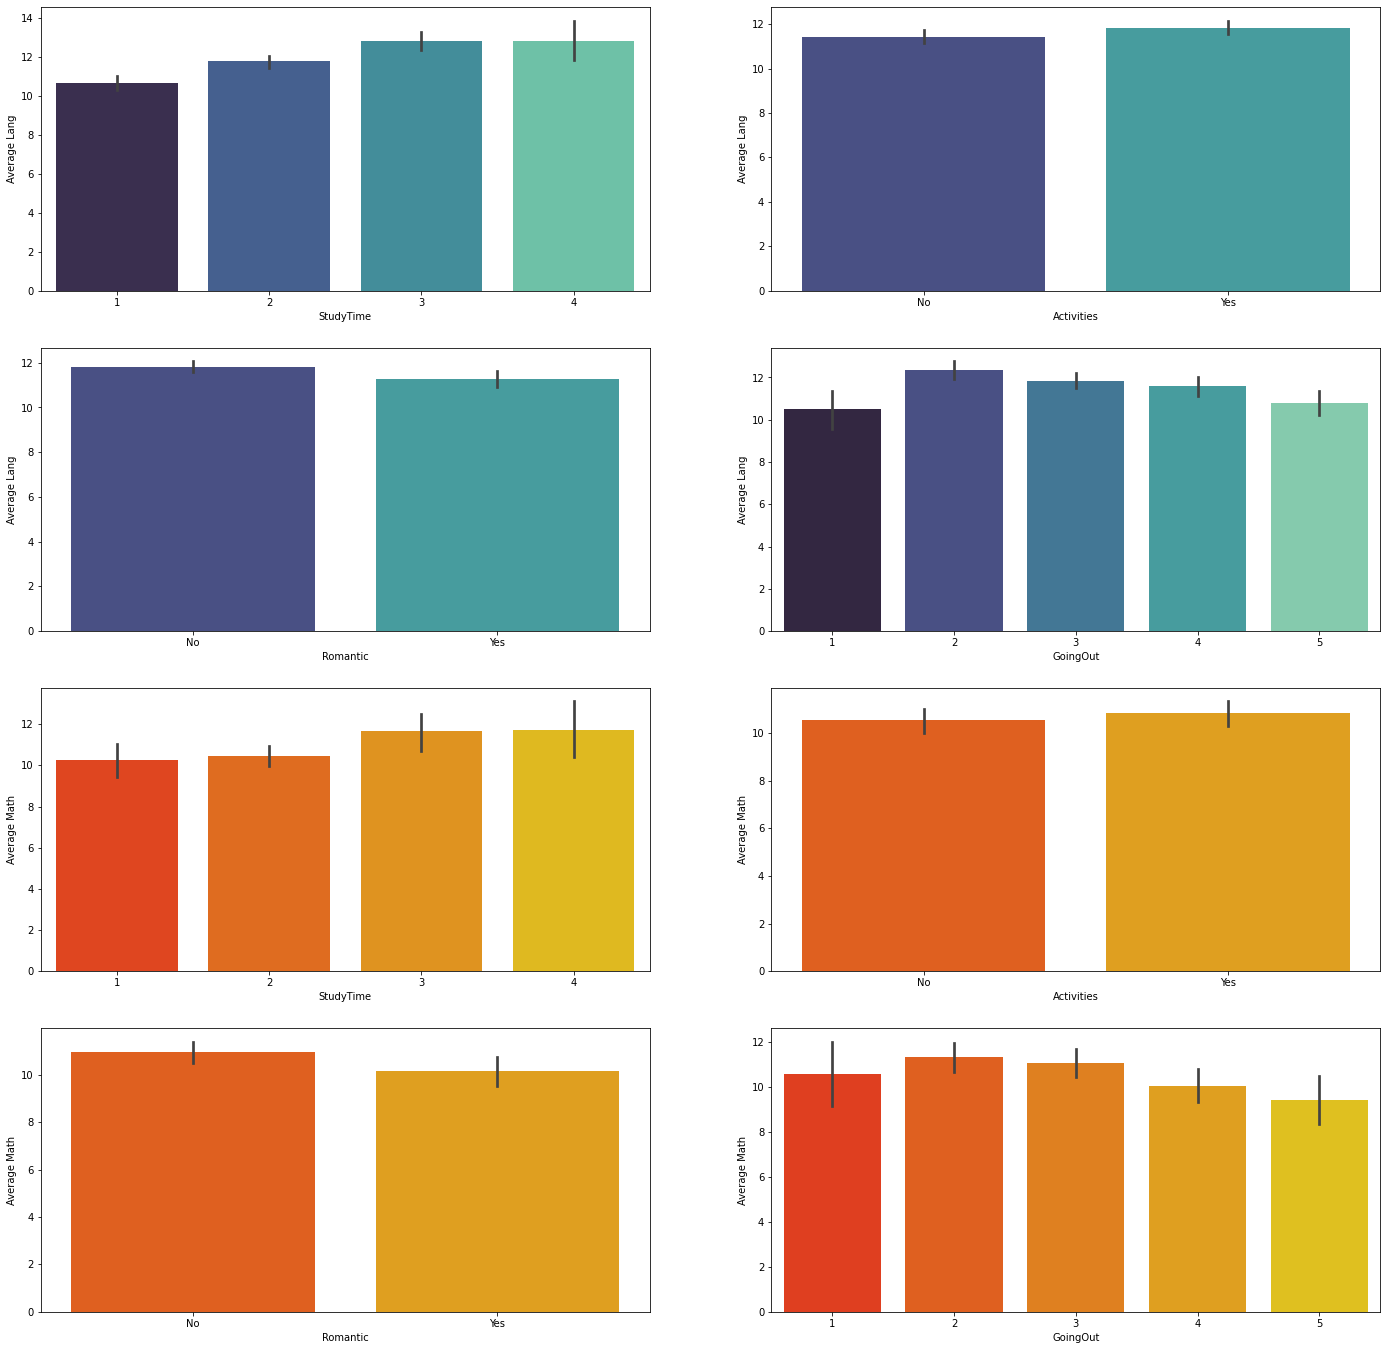

In [14]:
f , axes = plt.subplots(4,2, figsize = (24, 24))
axes[0,0] = sb.barplot(x = 'StudyTime', y = 'Average Lang', data = student_lang, ax = axes[0,0], palette = 'mako')
axes[0,1] = sb.barplot(x = 'Activities', y = 'Average Lang', data = student_lang, ax = axes[0,1], palette = 'mako')
axes[1,0] = sb.barplot(x = 'Romantic', y = 'Average Lang', data = student_lang, ax = axes[1,0], palette = 'mako')
axes[1,1] = sb.barplot(x = 'GoingOut', y = 'Average Lang', data = student_lang, ax = axes[1,1], palette = 'mako')

axes[2,0] = sb.barplot(x = 'StudyTime', y = 'Average Math', data = student_math, ax = axes[2,0], palette = 'autumn')
axes[2,1] = sb.barplot(x = 'Activities', y = 'Average Math', data = student_math, ax = axes[2,1], palette = 'autumn')
axes[3,0] = sb.barplot(x = 'Romantic', y = 'Average Math', data = student_math, ax = axes[3,0], palette = 'autumn')
axes[3,1] = sb.barplot(x = 'GoingOut', y = 'Average Math', data = student_math, ax = axes[3,1], palette = 'autumn')
print("Blue: Language\nRed: Math")
print("Scores vs student controlled factors:")

### Verdict
From the language barplots above, we see that out of these 4 variables under a student's control, study time appears to have the most effect on their average grades, with more studying leading to better grades. It is noteworthy that the increase in grades is less significant after rating 3. Participating in activities and staying clear of romance also seem to positively impact average grades, although not by much. However, while going out less seems to have a correlation with higher grades in general (ratings 2-5), students who very rarely went out with friends (rating 0) seemed to perform even poorer than those who went out very often (rating 5). This indicates that perhaps having a healthy relationship with peers is beneficial to ones grades.

Thus, for a student to achieve better language grades, it is recommended that they study at least 5-10 hours a week, participate in extra-curricular activities, avoid romantic relationships and spend time with friends in moderation.


Similarly for math, students who study at levels 3-4, take part in extra curricular activities and avoid romantic relationships tend to do better than those who do not. Students who also spend a moderate amount of time going out with friends also tend to perform better than those who spend little to no time. However, it appears that going out with friends more carries a higher risk of poorer grades in math as compared to language, as the decrease in average scores as going out increases is more severe than that of language.

It is thus recommended that students also study at least 5-10 hours a week, participate in activities and avoid romantic relationships to boost math grades, however extra attention should be given to the amount of time spent with friends and more regulation is required if trying to boost math as compared to language. 

In both subjects, the optimal frequency of going out is at a rating of 2/5.

## What can schools do (attributes that they can control) to help students perform better in these subjects?
### Schools can control SchoolSup and FreeTime
Schools are assumed to be able to
1. Freely offer support to students indiscriminately 
2. Freely adjust schooling hours

Thus create dataframe with these two factors and create columns for "Total" and "Average" as before.

In [15]:
school_lang = pd.DataFrame(lang[['SchoolSup', 'FreeTime','T1', 'T2', 'T3']])
school_math = pd.DataFrame(math[['SchoolSup', 'FreeTime','T1', 'T2', 'T3']])


In [16]:
school_lang['Total Lang'] = school_lang['T1'] + school_lang['T2'] + school_lang['T3']
school_lang['Average Lang'] = school_lang['Total Lang']/3
school_math['Total Math'] = school_math['T1'] + school_math['T2'] + school_math['T3']
school_math['Average Math'] = school_math['Total Math']/3

In [17]:
school_lang['SchoolSup'] = school_lang['SchoolSup'].astype('category')
school_lang['FreeTime'] = school_lang['FreeTime'].astype('category')
school_math['SchoolSup'] = school_math['SchoolSup'].astype('category')
school_math['FreeTime'] = school_math['FreeTime'].astype('category')

Blue: Language
Red: Math
Scores vs school controlled factors:


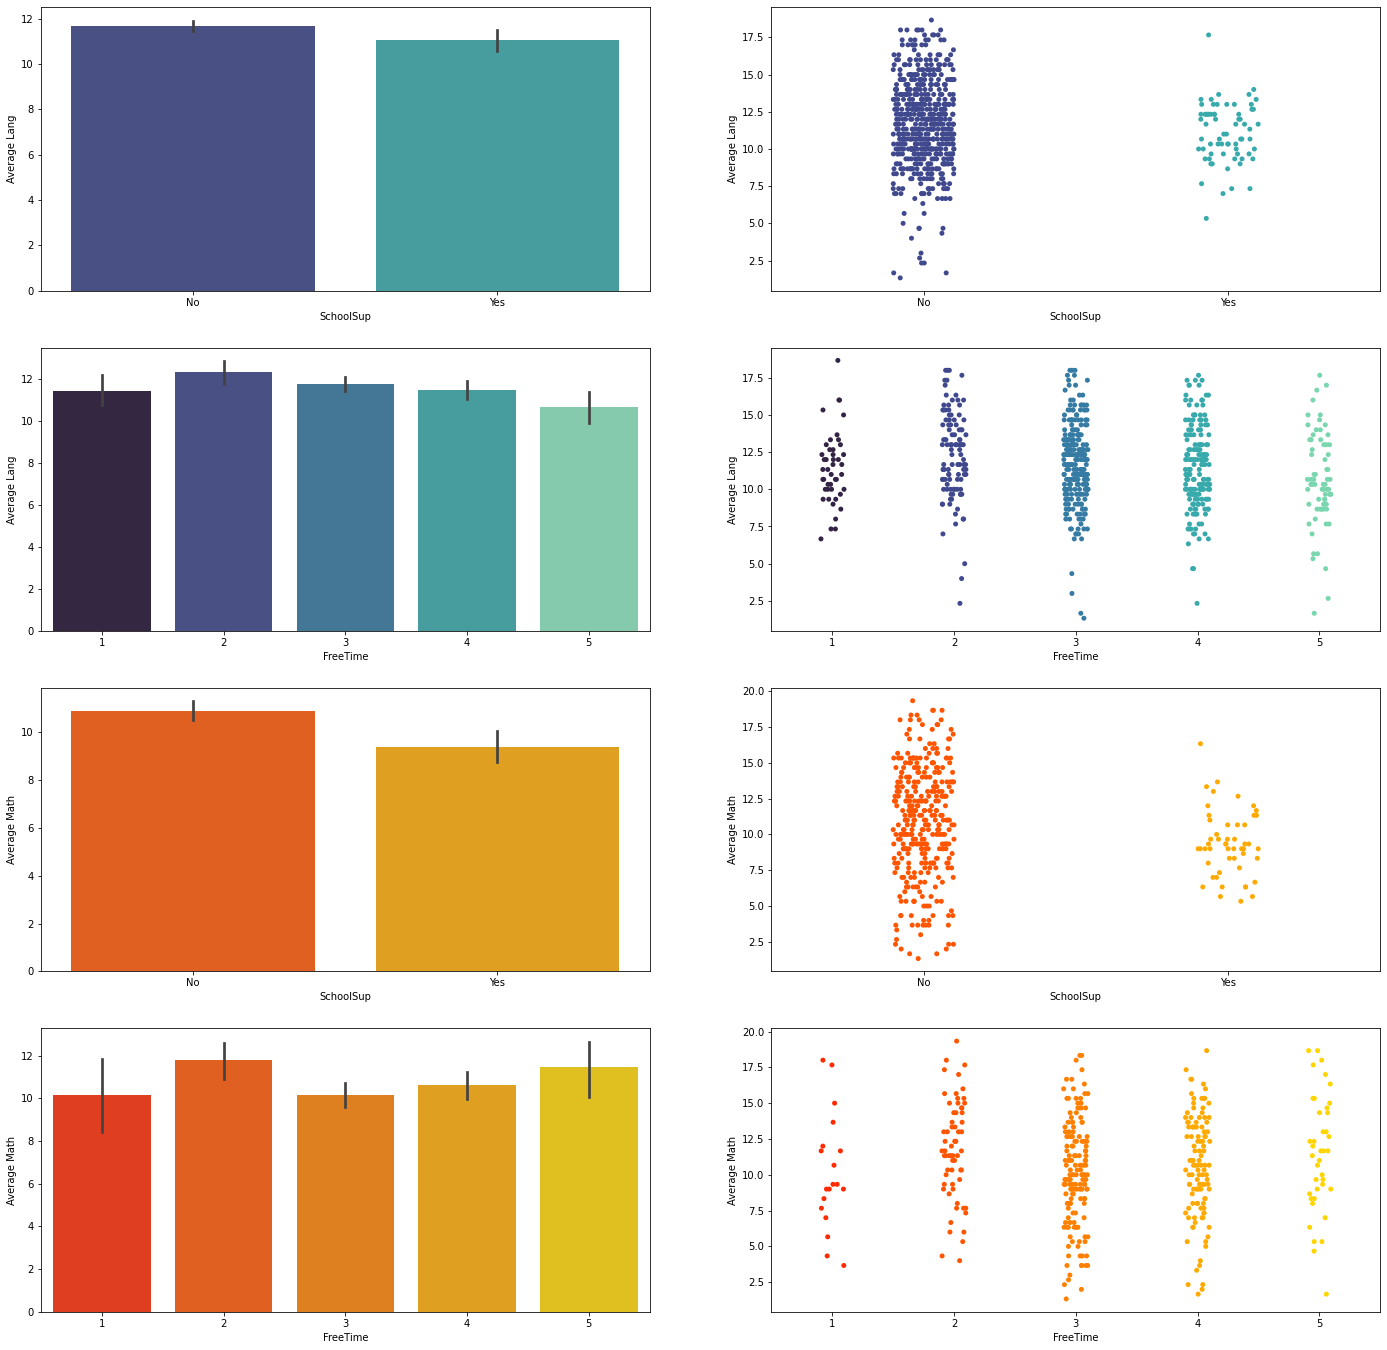

In [18]:
f,axes = plt.subplots(4,2, figsize = (24,24))
axes[0,0] = sb.barplot(x = 'SchoolSup', y = 'Average Lang', data = school_lang, ax = axes[0,0], palette = 'mako')
axes[0,1] = sb.stripplot(x = 'SchoolSup', y = 'Average Lang', data = school_lang, ax = axes[0,1], palette = 'mako')
axes[1,0] = sb.barplot(x = 'FreeTime', y = 'Average Lang', data = school_lang, ax = axes[1,0], palette = 'mako')
axes[1,1] = sb.stripplot(x = 'FreeTime', y = 'Average Lang', data = school_lang, ax = axes[1,1], palette = 'mako')

axes[2,0] = sb.barplot(x = 'SchoolSup', y = 'Average Math', data = school_math, ax = axes[2,0], palette = 'autumn')
axes[2,1] = sb.stripplot(x = 'SchoolSup', y = 'Average Math', data = school_math, ax = axes[2,1], palette = 'autumn')
axes[3,0] = sb.barplot(x = 'FreeTime', y = 'Average Math', data = school_math, ax = axes[3,0], palette = 'autumn')
axes[3,1] = sb.stripplot(x = 'FreeTime', y = 'Average Math', data = school_math, ax = axes[3,1], palette = 'autumn')

print("Blue: Language\nRed: Math")
print("Scores vs school controlled factors:")

Regarding language scores, at first glance it seems that SchoolSup harms rather than helps the students' grades, which is counter-intuitive. However, taking deeper analysis using stripplots, we see that the amount of students receiving support is significantly less than that of those who are not. This suggests inaccuracy due to lack of 'Yes' responses and thus is inconclusive. Another possible reason for this finding is that school support is offered specifically to students who are academically challenged. Without sufficient informaton on the data, not much can be said about this factor.

In the case of free time, it appears that too much free time after school could be detrimental students' grades. Except for the dip in scores at rating 1, ratings 2-5 all support this theory. Additionally, it is noteworthy that rating 1 also has a lack of data points compared to the other ratings.

Thus, schools could possibly regulate schooling hours to ensure students make the most of their time to pursue their academic goals, in turn improving performance.

Similarly for math scores, data for school support is too scarce to form an accurate conclusion. 

Interestingly for free time, there does not seem to be a conclusive correlation between free time and grades. However, as with language scores, the optimum free time rating is at 2/5.

Thus, it is recommended that schools adjust their hours accordingly and perhaps offer school support to more students in order to draw a conclusion about it's effectiveness.

## Which school has a better overall student performance in these two subjects? 
### Create dataframe isolating students from school A and school B
Similarly create columns for total and average grade.

In [19]:
schoolsort_lang = pd.DataFrame(lang[['School','T1', 'T2', 'T3']])
schoolsort_lang['School'] = schoolsort_lang["School"].astype('category')
schoolsort_math = pd.DataFrame(math[['School','T1', 'T2', 'T3']])
schoolsort_math['School'] = schoolsort_math["School"].astype('category')

In [20]:
schoolsort_lang['Total Lang'] = schoolsort_lang['T1'] + schoolsort_lang['T2'] + schoolsort_lang['T3']
schoolsort_lang['Average Lang'] = schoolsort_lang['Total Lang']/3
schoolsort_math['Total Math'] = schoolsort_math['T1'] + schoolsort_math['T2'] + schoolsort_math['T3']
schoolsort_math['Average Math'] = schoolsort_math['Total Math']/3


Plotting the average math and language scores for both schools.

Blue: Language
Red: Math
Scores vs school:


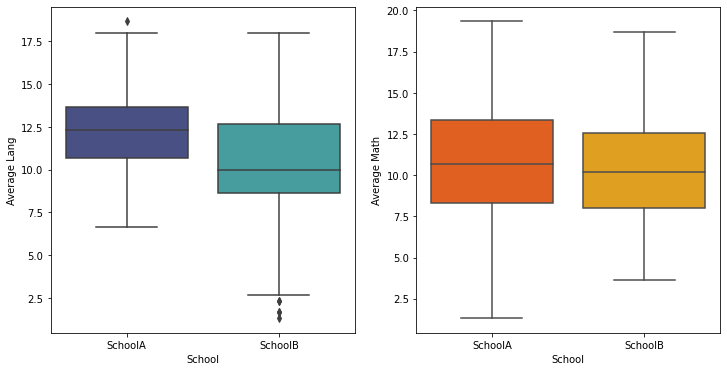

In [21]:
f, axes = plt.subplots(1,2, figsize = (12,6))
axes[0] = sb.boxplot(x = 'School', y = "Average Lang", data = schoolsort_lang, ax = axes[0], palette = 'mako')
axes[1] = sb.boxplot(x = 'School', y ="Average Math", data = schoolsort_math, ax = axes[1], palette = 'autumn')

print("Blue: Language\nRed: Math")
print("Scores vs school:")

Blue: Language
Red: Math
Comparison of number of students who took tests per school:


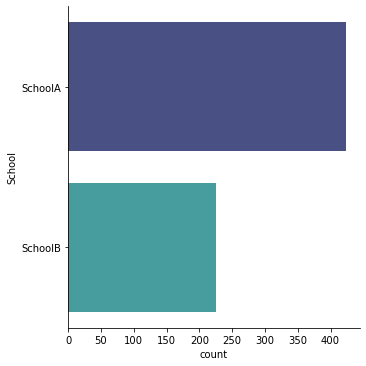

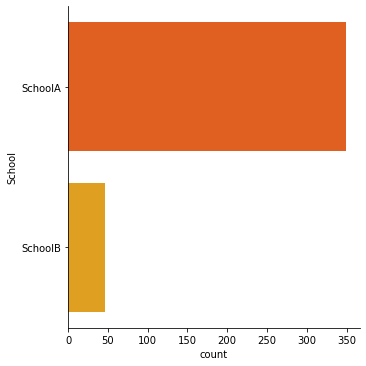

In [22]:
sb.catplot(y = 'School', data = schoolsort_lang, kind = "count", palette = 'mako')
sb.catplot(y = 'School', data = schoolsort_math, kind = "count", palette= 'autumn')

print("Blue: Language\nRed: Math")
print("Comparison of number of students who took tests per school:")

### Verdict

Looking at the above boxplots, we see that for language, school A does strictly better than school B in terms of median and variance. The median is around 12.5 for school A and 10.0 for school B. 

However, the math scores for school A are more varied than that of school B. Although the median for school A is slightly higher than that of school B (around 11 to 10.5) the spread of scores for school A indicates a much greater gap between students' ability. 

It is also noteworthy that the number of students who took the language and especially the math test is significantly higher in school A than in school B as seen in the catplots. This could be a reason for the large distribution of math scores for school A. While it would have been possible to do sampling from school A to ensure that an equal number of students are compared for each school, the objective is to measure overall performance, thus this step was not included.

## Why do you think that is?
### What factors that affect grades are more prevalent in either school?
Looking at above findings, factors that have a significant impact on grades are parents' occupations, parents' education level, study time, and going out.
Thus create a dataframe allowing us to analyse prevalence of these factors in either school.
We would expect to find a higher number of students in school A who study more and go out at a moderate level than in school B. We would also expect to see more higher-educated parents, working as teachers or healthcare workers.

In [23]:
factors_lang = pd.DataFrame(lang[['School', 'MomEdu', 'DadEdu', 'MomJob', 'DadJob', 'StudyTime', 'GoingOut']])
factors_math = pd.DataFrame(math[['School', 'MomEdu', 'DadEdu', 'MomJob', 'DadJob', 'StudyTime', 'GoingOut']])


In [24]:
x = ['School', 'MomEdu', 'DadEdu', 'MomJob', 'DadJob', 'StudyTime', 'GoingOut']
for i in x:
    factors_lang[i] = factors_lang[i].astype('category')
    factors_math[i] = factors_math[i].astype('category')

In [25]:
factors_lang_A = pd.DataFrame(factors_lang.loc[factors_lang['School'] == 'SchoolA'])
factors_math_A = pd.DataFrame(factors_math.loc[factors_math['School'] == 'SchoolA'])
factors_lang_B = pd.DataFrame(factors_lang.loc[factors_lang['School'] == 'SchoolB'])
factors_math_B = pd.DataFrame(factors_math.loc[factors_math['School'] == 'SchoolB'])

### Sampling of students from school A
As there are many more students from school A than there are in school B, it would now be apt to randomly sample a specific number of students from school A equal to the number of students in school B before doing the comparison.

### Comparison of schools A and B student demographic (language)

In [26]:
factors_lang_A = factors_lang_A.sample(n = factors_lang_B.shape[0])
factors_math_A = factors_math_A.sample(n = factors_math_B.shape[0])


Pastel: School A
Dark: School B
Depiction of significant factors affecting language scores prevalent in each school: 
     MomJob              DadJob                MomEdu               DadEdu              StudyTime              GoingOut


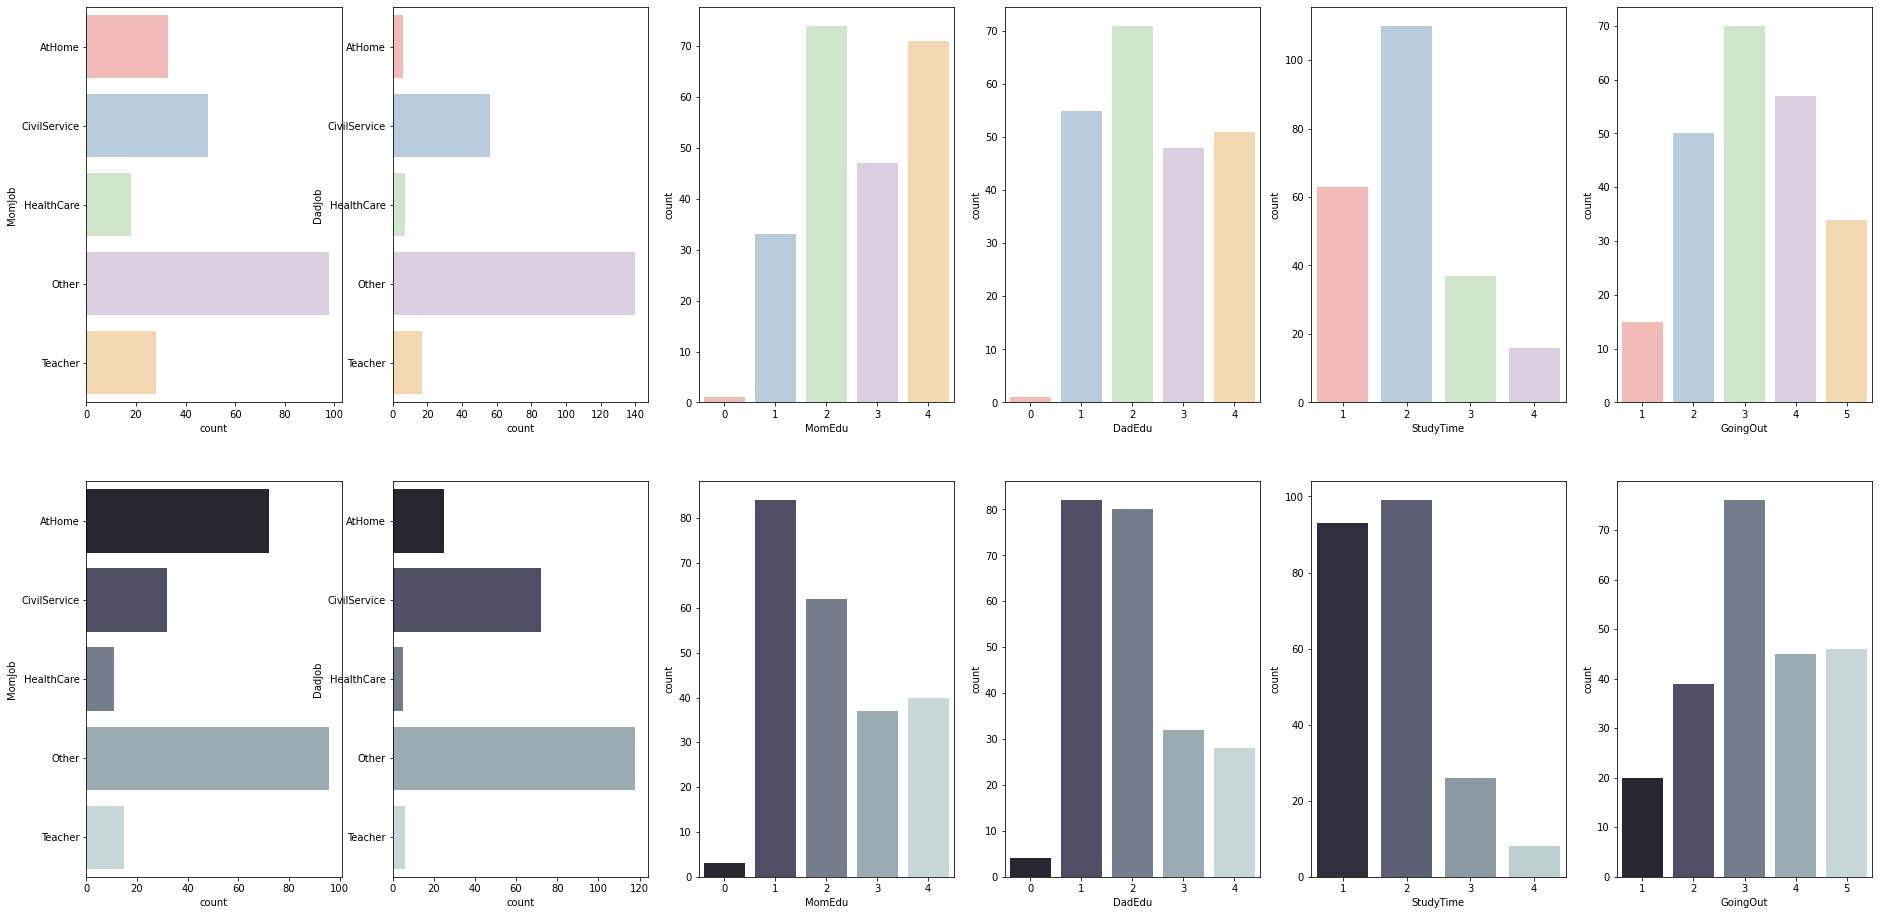

In [27]:
f, axes = plt.subplots(2,6, figsize = (32,16))
axes[0,0] = sb.countplot(y = 'MomJob', data = factors_lang_A, ax = axes[0,0], palette = 'Pastel1')
axes[0,1] = sb.countplot(y = 'DadJob', data = factors_lang_A, ax = axes[0,1], palette = 'Pastel1')
axes[0,2] = sb.countplot(x = 'MomEdu', data = factors_lang_A, ax = axes[0,2], palette = 'Pastel1')
axes[0,3] = sb.countplot(x = 'DadEdu', data = factors_lang_A, ax = axes[0,3], palette = 'Pastel1')
axes[0,4] = sb.countplot(x = 'StudyTime', data = factors_lang_A, ax = axes[0,4], palette = 'Pastel1')
axes[0,5] = sb.countplot(x = 'GoingOut', data = factors_lang_A, ax = axes[0,5], palette = 'Pastel1')



axes[1,0] = sb.countplot(y = 'MomJob', data = factors_lang_B, ax = axes[1,0], palette = 'bone')
axes[1,1] = sb.countplot(y = 'DadJob', data = factors_lang_B, ax = axes[1,1], palette = 'bone')
axes[1,2] = sb.countplot(x = 'MomEdu', data = factors_lang_B, ax = axes[1,2], palette = 'bone')
axes[1,3] = sb.countplot(x = 'DadEdu', data = factors_lang_B, ax = axes[1,3], palette = 'bone')
axes[1,4] = sb.countplot(x = 'StudyTime', data = factors_lang_B, ax = axes[1,4], palette = 'bone')
axes[1,5] = sb.countplot(x = 'GoingOut', data = factors_lang_B, ax = axes[1,5], palette = 'bone')

print("Pastel: School A\nDark: School B")
print("Depiction of significant factors affecting language scores prevalent in each school: ")
print("     MomJob              DadJob                MomEdu               DadEdu              StudyTime              GoingOut")

### Verdict
As expected, we see that for school A, there is a larger proportion of students with parents as healthcare workers and teachers than students in school B. There are is also a higher number of students with parents with better education levels of >= 2. Additionally, there is also a larger number of students studying at least 5-10 hours a week. Lastly, we see a distinct contrast between the schools for the number of students going out with friends at the optimum frequency of 2, where school A outdoes school B.

### Comparison of schools A and B student demographic (math)

Pastel: School A
Dark: School B
Depiction of significant factors affecting language scores prevalent in each school: 
     MomJob              DadJob                MomEdu               DadEdu              StudyTime              GoingOut


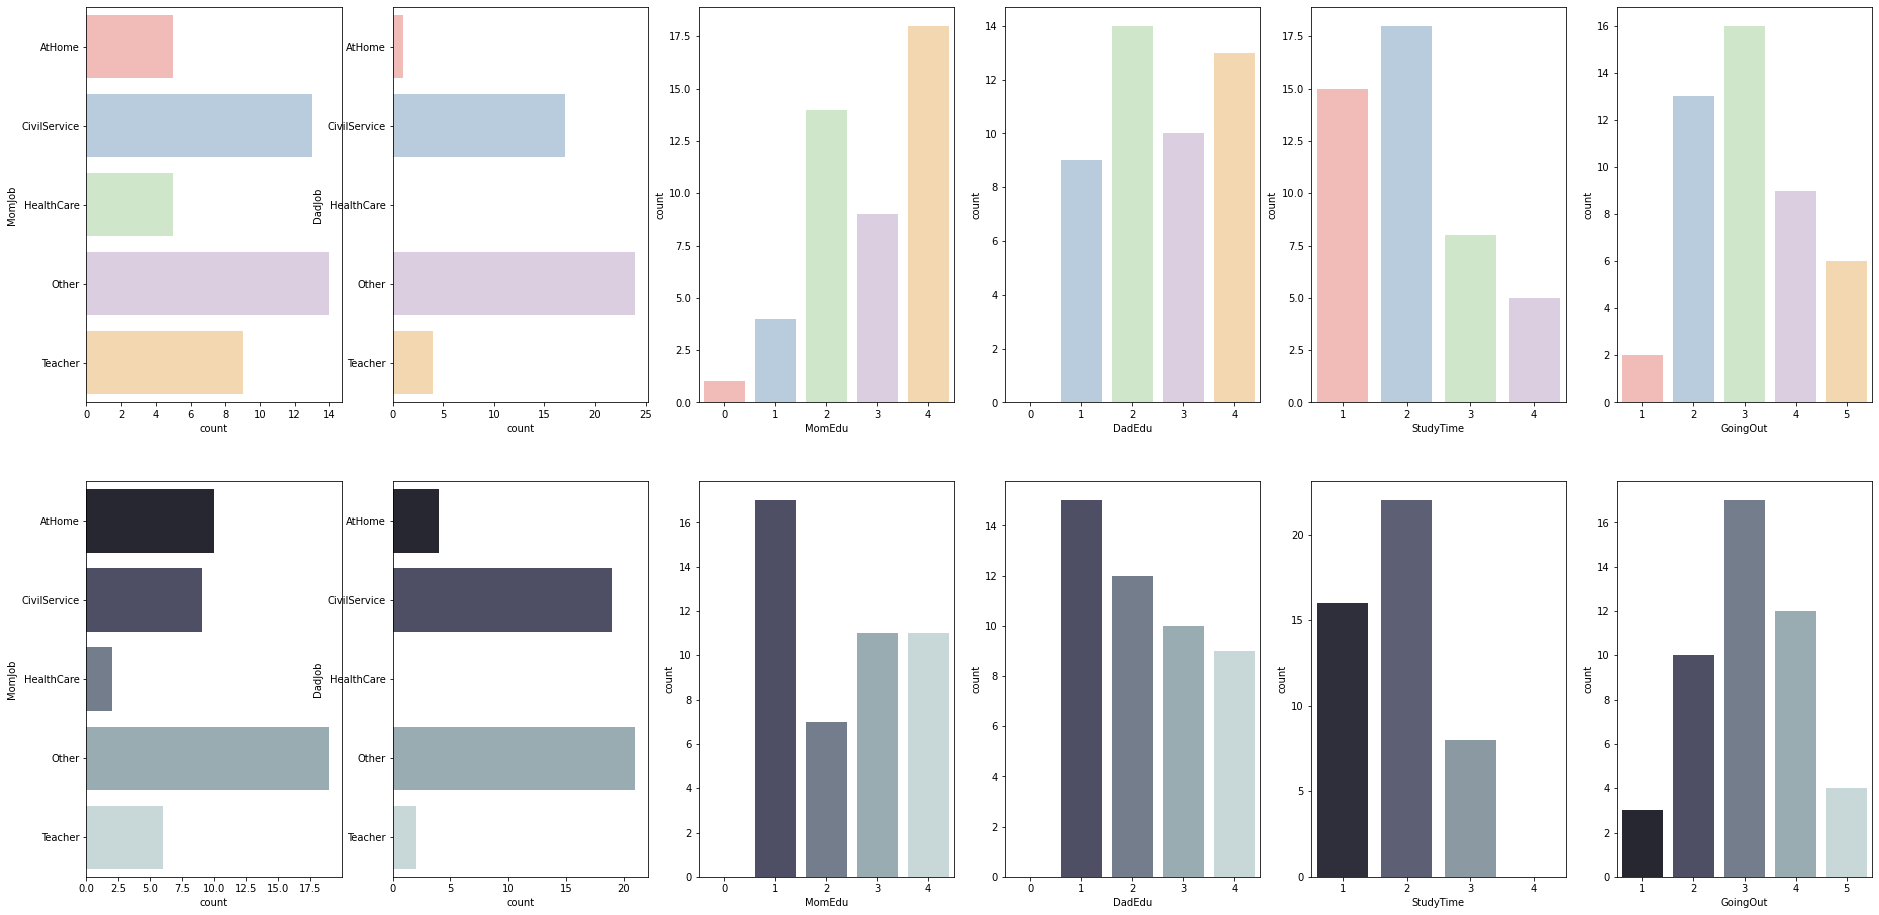

In [28]:
f, axes = plt.subplots(2,6, figsize = (32,16))
axes[0,0] = sb.countplot(y = 'MomJob', data = factors_math_A, ax = axes[0,0], palette = 'Pastel1')
axes[0,1] = sb.countplot(y = 'DadJob', data = factors_math_A, ax = axes[0,1], palette = 'Pastel1')
axes[0,2] = sb.countplot(x = 'MomEdu', data = factors_math_A, ax = axes[0,2], palette = 'Pastel1')
axes[0,3] = sb.countplot(x = 'DadEdu', data = factors_math_A, ax = axes[0,3], palette = 'Pastel1')
axes[0,4] = sb.countplot(x = 'StudyTime', data = factors_math_A, ax = axes[0,4], palette = 'Pastel1')
axes[0,5] = sb.countplot(x = 'GoingOut', data = factors_math_A, ax = axes[0,5], palette = 'Pastel1')

axes[1,0] = sb.countplot(y = 'MomJob', data = factors_math_B, ax = axes[1,0], palette = 'bone')
axes[1,1] = sb.countplot(y = 'DadJob', data = factors_math_B, ax = axes[1,1], palette = 'bone')
axes[1,2] = sb.countplot(x = 'MomEdu', data = factors_math_B, ax = axes[1,2], palette = 'bone')
axes[1,3] = sb.countplot(x = 'DadEdu', data = factors_math_B, ax = axes[1,3], palette = 'bone')
axes[1,4] = sb.countplot(x = 'StudyTime', data = factors_math_B, ax = axes[1,4], palette = 'bone')
axes[1,5] = sb.countplot(x = 'GoingOut', data = factors_math_B, ax = axes[1,5], palette = 'bone')

print("Pastel: School A\nDark: School B")
print("Depiction of significant factors affecting language scores prevalent in each school: ")
print("     MomJob              DadJob                MomEdu               DadEdu              StudyTime              GoingOut")

### Verdict*
Similarly for the math tests, there are many more students in school A that meet the criteria for "performing better" in terms of having teachers and healthcare workers as parents, parents having education levels of at least 2, studying at least 5-10 hours a week and going out moderately at frequency 2 as compared to school B. Although previous findings were not overly convincing regarding overall student performance in math tests, these findings suggest that the individual math scores for school A should also be strictly better than school B.

Thus, explore through a random sampling of an equal number of students from school A to see if this theory is supported.

In [29]:
testA = pd.DataFrame(math.loc[math['School'] == 'SchoolA'])
testB = pd.DataFrame(math.loc[math['School'] == 'SchoolB'])

In [30]:
testA['Average'] = (testA['T1'] + testA['T2'] + testA['T3'])/3
testB['Average'] = (testB['T1'] + testB['T2'] + testB['T3'])/3

In [31]:
testA = testA.sample(n = testB.shape[0])

In [32]:
joint = pd.concat([testA, testB])

Sampled students from school A equating to number of students in school B math comparison: 


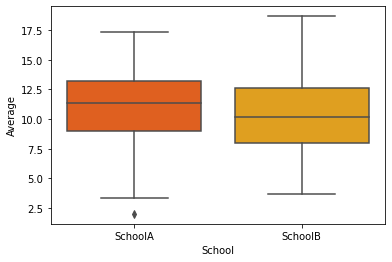

In [33]:
sb.boxplot(x = 'School', y = 'Average', data = joint, palette = 'autumn')
print("Sampled students from school A equating to number of students in school B math comparison: ")

### Verdict
As shown in the boxplots of the sampled students, when compared equally, it is indeed true that school A students do perform better than school B even in the math test. This supports the idea that school A students perform better than students in school B due to family background, study time and going out.

## How do the students perform over time? Are they consistent across terms, or do they gradually improve?
### Look at scores varying across terms 1,2 and 3.
Create a dataframe containing students term scores and analyse improvements/deprovements over time.

In [34]:
time_lang = pd.DataFrame(lang[['T1', 'T2', 'T3']])
time_math = pd.DataFrame(math[['T1', 'T2', 'T3']])

Blue: Language
Red: Math
Performance of students over time:


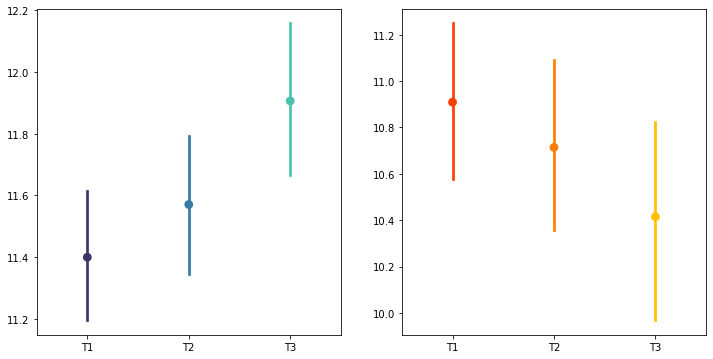

In [35]:
f, axes = plt.subplots(1,2, figsize = (12,6))
axes[0] = sb.pointplot(data = time_lang, ax = axes[0], palette = 'mako')
axes[1] = sb.pointplot(data = time_math, ax = axes[1], palette = 'autumn')
print("Blue: Language\nRed: Math")
print("Performance of students over time:")

### Verdict
As seen in the pointplot, the central scores across terms gradually increases for language and decreases for math.

## Bonus question: For students who have taken both language and math tests, which subject were they better in?
First create a dataframe representing students who have taken both math and language tests, identified by matching rows in all columns except term test scores.

In [36]:
same_lang = pd.DataFrame(lang).copy()
same_math = pd.DataFrame(math).copy()
same_lang = same_lang.rename(columns = {'T1':'T1(L)', 'T2': 'T2(L)', 'T3': 'T3(L)'})
same_math = same_math.rename(columns = {'T1':'T1(M)', 'T2': 'T2(M)', 'T3': 'T3(M)'})

In [37]:
same = pd.merge(same_lang, same_math)

In [38]:
same['(L) Average'] = (same['T1(L)']+same['T2(L)']+same['T3(L)'])/3
same['(M) Average'] = (same['T1(M)']+same['T2(M)']+same['T3(M)'])/3

In [39]:
same.head()

,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,...,Health,Absences,T1(L),T2(L),T3(L),T1(M),T2(M),T3(M),(L) Average,(M) Average
0,SchoolA,Male,16,Urban,2,2,Other,Other,1,2,...,3,0,13,12,13,12,12,11,12.666667,11.666667
1,SchoolA,Male,15,Urban,2,2,Other,Other,1,3,...,3,0,14,14,15,14,16,16,14.333333,15.333333
2,SchoolA,Male,15,Urban,4,3,Teacher,Other,1,2,...,1,0,12,13,14,13,14,15,13.000000,14.000000
3,SchoolA,Male,15,Urban,4,4,HealthCare,HealthCare,1,1,...,5,0,11,12,12,12,15,15,11.666667,14.000000
4,SchoolA,Male,15,Urban,4,4,HealthCare,CivilService,1,2,...,5,0,10,11,11,9,11,12,10.666667,10.666667


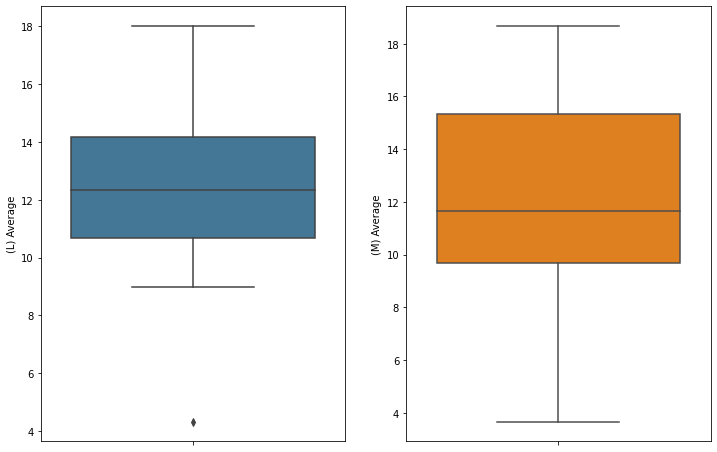

In [40]:
f, axes = plt.subplots(1,2, figsize = (12,8))
axes[0] = sb.boxplot(y = '(L) Average', data = same, ax = axes[0], palette = 'mako')
axes[1] = sb.boxplot(y = '(M) Average', data = same, ax = axes[1], palette = 'autumn')

### Verdict
From the boxplots, we see that students who took both tests generally did better in language than in math, which is in line with our previous findings.

## Bonus question #2: Is there a relationship between PaidSup and FamilySup? 
### Is a supportive family more likely to spend on additional classes for their child?
To explore this, it is necessary to convert the categorical data into a numeric form in order to find a correlation. LabelEncoder will be used for this.

In [41]:
math['PaidSup'] = math['PaidSup'].astype('category')
math['FamilySup'] = math['FamilySup'].astype('category')
X_math = pd.DataFrame(math['PaidSup'])
X_math = X_math.rename(columns = {'PaidSup': 'PaidSup(M)'})
y_math = pd.DataFrame(math['FamilySup'])
y_math = y_math.rename(columns = {'FamilySup': 'FamilySup(M)'})

lang['PaidSup'] = lang['PaidSup'].astype('category')
lang['FamilySup'] = lang['FamilySup'].astype('category')
X_lang = pd.DataFrame(lang['PaidSup'])
X_lang = X_lang.rename(columns = {'PaidSup': 'PaidSup(L)'})
y_lang = pd.DataFrame(lang['FamilySup'])
y_lang = y_lang.rename(columns = {'FamilySup': 'FamilySup(L)'})

In [42]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [43]:
labX_math = lab.fit_transform(X_math.values.ravel())
laby_math = lab.fit_transform(y_math.values.ravel())
labX_lang = lab.fit_transform(X_lang.values.ravel())
laby_lang = lab.fit_transform(y_lang.values.ravel())

In [44]:
X_math['PaidSupEncoded(M)'] = labX_math
y_math['FamilySupEncoded(M)'] = laby_math
X_lang['PaidSupEncoded(L)'] = labX_lang
y_lang['FamilySupEncoded(L)'] = laby_lang

In [45]:
joint_math = pd.concat([X_math,y_math], axis = 1)
joint_lang = pd.concat([X_lang,y_lang], axis = 1)

In [46]:
joint_math.head(), joint_lang.head()

(  PaidSup(M)  PaidSupEncoded(M) FamilySup(M)  FamilySupEncoded(M)
 0         No                  0           No                    0
 1         No                  0          Yes                    1
 2        Yes                  1           No                    0
 3        Yes                  1          Yes                    1
 4        Yes                  1          Yes                    1,
   PaidSup(L)  PaidSupEncoded(L) FamilySup(L)  FamilySupEncoded(L)
 0         No                  0           No                    0
 1         No                  0          Yes                    1
 2         No                  0           No                    0
 3         No                  0          Yes                    1
 4         No                  0          Yes                    1)

Blue: Language
Red: Math
Correlation between FamilySup and PaidSup:


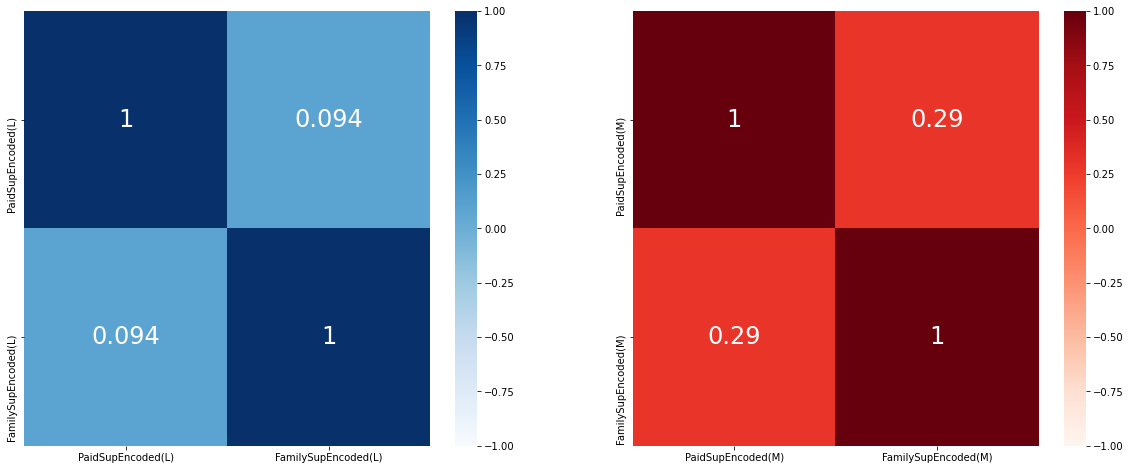

In [47]:
f, axes = plt.subplots(1,2,figsize = (20,8))
axes[1] = sb.heatmap(joint_math.corr(), annot = True, vmin = -1, vmax = 1, cmap = "Reds",  annot_kws = {"size": 24}, ax = axes[1])
axes[0] = sb.heatmap(joint_lang.corr(), annot = True, vmin = -1, vmax = 1, cmap = "Blues", annot_kws = {"size": 24}, ax = axes[0])
print("Blue: Language\nRed: Math")
print("Correlation between FamilySup and PaidSup:")

## Verdict
From the heatmaps, we see that although there is some correlation between how supportive a family is and how likely the student of that family is to receive additional classes, it is only really significant in terms of students who took the math test. This begs the question of whether this higher correlation is due to math being deemed a "tougher" subject which warrants more students requiring PaidSup, as it is apparent from the language tests that FamilySup is not much of a factor.


In [48]:
joint_math.describe()

,PaidSupEncoded(M),FamilySupEncoded(M)
count,395.000000,395.000000
mean,0.458228,0.612658
std,0.498884,0.487761
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


The above description of joint_math shows that the mean of FamilySup is higher than that of PaidSup, thus a higher number of "yes" or "1" responses in PaidSupEncoded(M) would have resulted in a higher correlation. This justifies the exploration of our above suspicions, which will be followed up on below.

## Bonus question #2.5: Is PaidSup more likely to be given to students taking the math test than those taking the language test?
### Based on the assumption that the students knew what tests they were taking in advance.
Find percentage of students who received PaidSup in both language and math datasets respectively and compare the two.

In [49]:
percent_lang = pd.DataFrame(lang['PaidSup'])
percent_math = pd.DataFrame(math['PaidSup'])

percent_lang['PaidSup'] = percent_lang['PaidSup'].astype('category')
percent_math['PaidSup'] = percent_math['PaidSup'].astype('category')

percent_lang = percent_lang.rename(columns = {'PaidSup' : 'PaidSup(L)'})
percent_math = percent_math.rename(columns = {'PaidSup' : 'PaidSup(M)'})

In [50]:
percent_lang.describe(), percent_math.describe()

(       PaidSup(L)
 count         649
 unique          2
 top            No
 freq          610,
        PaidSup(M)
 count         395
 unique          2
 top            No
 freq          214)

In [51]:
proportion_lang_yes = (649-610)/649
proportion_math_yes = (395-214)/395

In [52]:
print("Received PaidSup for language test:", proportion_lang_yes) 
print("Received PaidSup for math test:", proportion_math_yes)

Received PaidSup for language test: 0.060092449922958396
Received PaidSup for math test: 0.4582278481012658


In [53]:
ratio = proportion_math_yes/proportion_lang_yes
ratio = round(ratio,2)
print("Ratio of students receiving PaidSup for math vs language:", ratio)

Ratio of students receiving PaidSup for math vs language: 7.63


## Verdict
As seen from the above calculations, there are 7.63 times as many students receiving PaidSup who took the math test as compared to the language test. This validates the theory that assuming students knew what test they were going to take, those taking the math test felt a greater need to employ additional paid classes.

# Conclusion

 ### Family factors and student performance
 - It was assumed that family background consisted of FamilyRel, FamilySup, MomEdu, DadEdu, MomJob and DadJob. Student performance was measured using average score across all 3 terms to offset the possibility of extreme points due to some term scores being 0. Each of these factors were plotted against average score per student for both language and math tests in order to ascertain a relationship. 
 
    Findings: FamilyRel and FamilySup proved to have little effect. MomEdu, DadEdu, MomJob and DadJob were more significant. Higher levels of education were related to higher test scores in both subjects. Students with teachers as parents tended to have higher test scores in both subjects.
  
### Student controlled factors and student performance
- It was determined that student controlled factors included StudyTime, Activities, Romantic and GoingOut. This was under the assumption that students were able to study as they pleased, extra-curricular activities were not mandated, all students were attracted to at least one other student, and they were able to meet their friends freely. While all factors seemed to have an effect on test scores for both subjects, the impact of Activities and Romantic was much less than that of StudyTime and GoingOut. 

    Findings : For StudyTime, the more a student studied the better they scored. In general, studying at least 5-10 hours was best. For GoingOut, interestingly going out in moderation was better than not going out at all. Specifically, going out at a frequency level of 2 was optimal. This could suggest the importance of healthy peer-to-peer relationships in determining a student's performance.  

### School controlled factors and student performance
- School controlled factors were deemed to be SchoolSup and FreeTime. This decision was made assuming that SchoolSup was distributed to students by the school with no prerequisite and that schooling hours were not mandated and could be decided by the school. 

    Findings: SchoolSup proved to be inconclusive for both language and math tests due to the lack of data points indicating "Yes" for SchoolSup. FreeTime was shown to have mixed effects on language and math tests takers. For language, there was a clearer trend supporting that students should not be allowed too much free time. However, this is subjective as what students do with their free time is ambiguous. For math, results were more varied with no clear pattern. In both cases, optimal level of free time was at 2 out of 5.
    
### Schools and overall student performance
- Students from school A and B were compared against each other. This was done on the basis if finding overall performance which meant taking into account the grades of every student in both schools, despite the fact that School A contained more students than School B.

    Findings: School A overall had better grades than School B for language, while results for math were more less decisive due to a large uncertainty. 
    
### Reasons for School A performing better than School B
 - Possible factors affecting school performance were determined from previous findings. Significant factors used in this analysis were MomJob, DadJob, MomEdu, DadEdu, StudyTime and GoingOut. For language, expected outcome would be that School A students would have more parents as teachers with higher education, study more and go out in moderation. As this was an analysis involving the count of responses on the demographic of students, it was appropriate to sample an equal number of students from school A to match that of school B. 
 
     Findings: In line with expected outcome, language test takers in school A met all the criteria for performing better than students in school B. There were more teachers as parents with education levels >= 2 and students studied more and went out in moderation. These were also apparent for the math test takers which suggested that the math test scores for school A should indeed be better than school B and that perhaps the measurement of overall performance was skewed by difference in sample size. Thus, sample of students in school A was taken and compared against school B in similar fashion and it was found that performance in school A for math was in fact also better than school B as expected.
     
### Students' performance over time
 - Students' term 1,2 and 3 scores for both language and math tests were compared to determine a trend with respect to time. 
 
    Findings - Students generally improved for language and deproved for math.
    
### Bonus question #1: For students taking both language and math tests, which did they do better in?
 - Students who took both tests were first identified using all personal information provided and matching this information between the language and math datasets. After which, average test scores were used to determine which they did better in.
 
     Findings - Students generally did better in language than in math.
     
### Bonus question #2: Is there a relationship between PaidSup and FamilySup?
 - In this question, it was assumed that PaidSup was a luxury that all families could afford, and was paid for by parents for their children. This aimed to ascertain if a more supportive family was more likely to increase expenditure for the sake of their child. 
 
    Findings - For students who took the language test, how supportive their families were seemed to have no bearing on whether they received PaidSup or not, with a low correlation of 0.094. However, students who took the math test seemed to have a higher correlation of 0.29. Strictly looking at FamilySup and PaidSup, there seemed to be little to no relation.
    
### Bonus question #2.5: Why does math have a higher correlation? Is it due to more math test takers needing extra help?
 - It was first determined that an increase in the number of positive responses for receiving PaidSup would have resulted in a higher correlation. This implied that there were more students taking PaidSup who took the math test than those who took the language test. Mathematical analysis was done to find out if there were indeed more students with PaidSup taking math than there were taking language
 
    Findings - It is shown that there are indeed more students receiving PaidSup who took math than those who took language, in fact there were 7.63 times more of such students. Coupled with the fact that students generally did better in language, a hypothesis was made that students were more likely to receive PaidSup for a subject they were weaker in.